In [53]:
import numpy as np
import pandas as pd

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Without Transformation

In [6]:
df = pd.read_csv('titanic-csv.csv', usecols=['Age', 'Fare', 'Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13080\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(712, 2)

In [19]:
X_test.shape

(179, 2)

In [20]:
y_train.shape

(712,)

In [21]:
y_test.shape

(179,)

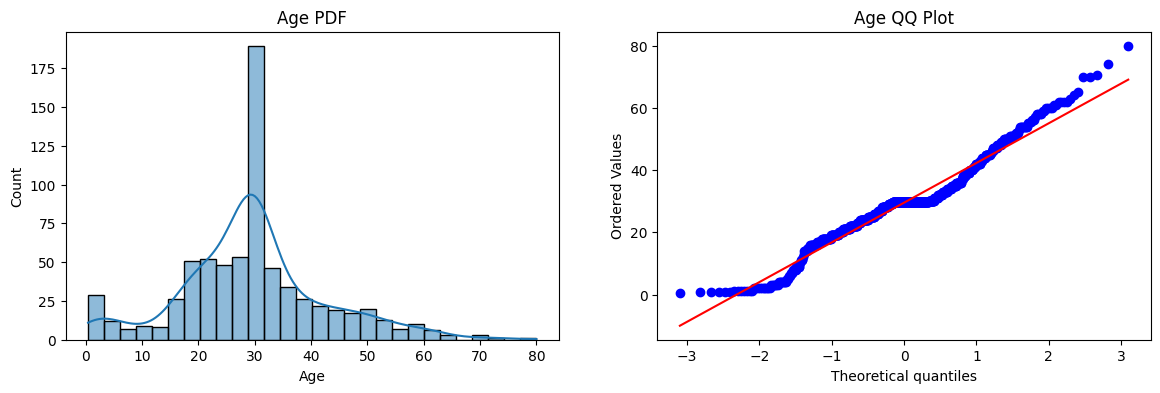

In [34]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

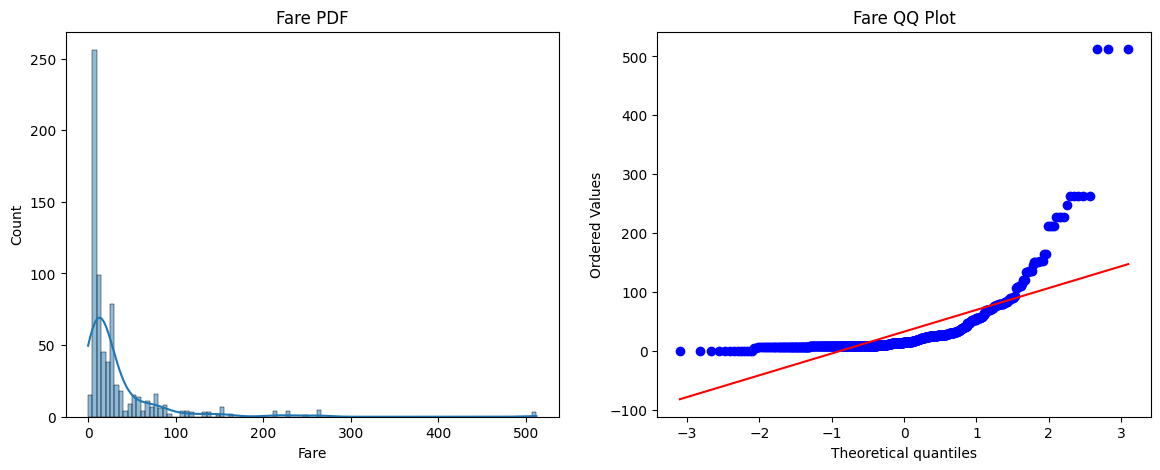

In [116]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [47]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [49]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [57]:
print('Accuracy score LR: ', accuracy_score(y_test, y_pred))
print('Accuracy score DT: ', accuracy_score(y_test, y_pred1))

Accuracy score LR:  0.6480446927374302
Accuracy score DT:  0.6759776536312849


# With Transformation

In [63]:
trf = FunctionTransformer(func=np.log1p)


In [65]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [66]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [67]:
clf.fit(X_train_transformed, y_train)

LogisticRegression()

In [68]:
clf2.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [71]:
y_pred = clf.predict(X_test_transformed)

In [72]:
y_pred1 = clf2.predict(X_test_transformed)

In [74]:
print('Accuracy LR: ', accuracy_score(y_test, y_pred))

Accuracy LR:  0.6815642458100558


In [75]:
print('Accuracy DT: ', accuracy_score(y_test, y_pred1))

Accuracy DT:  0.6815642458100558


In [78]:
X_transformed = trf.fit_transform(X)

In [79]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()


In [81]:
print('LR', np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6566416978776529


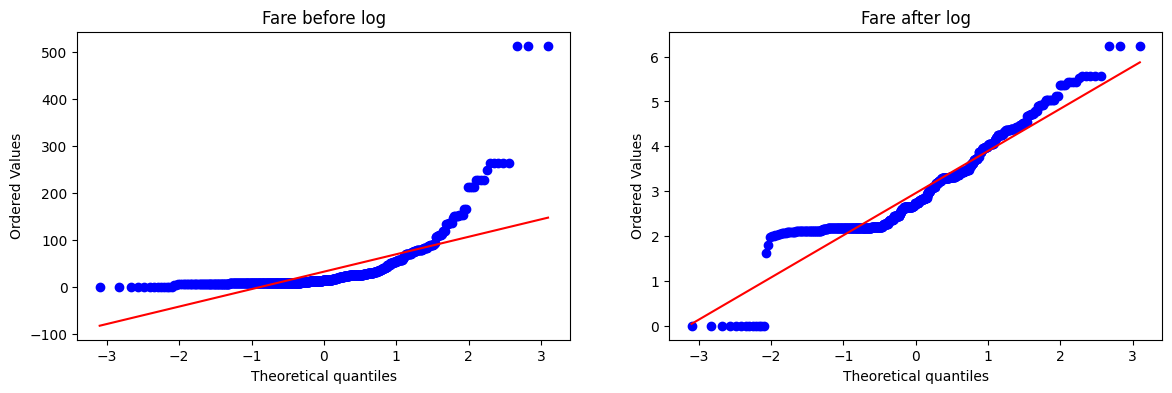

In [86]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare after log')
plt.show()

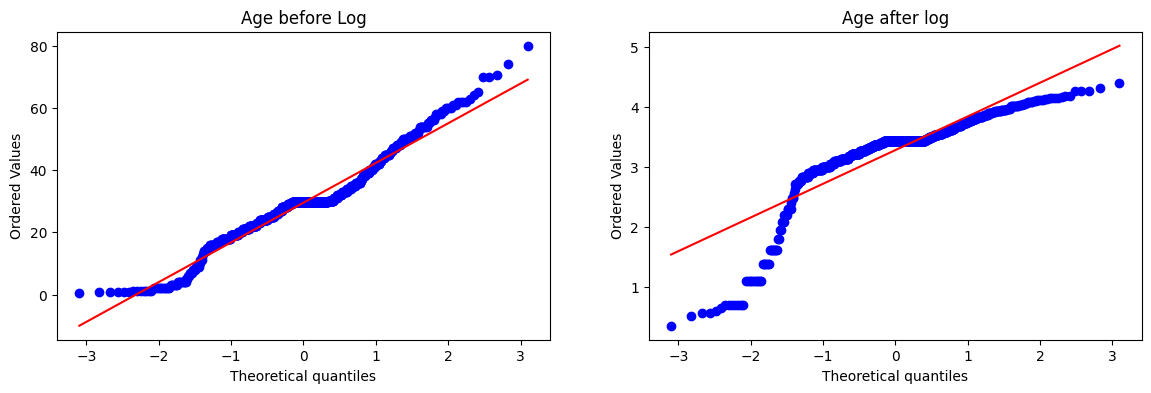

In [92]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age after log')
plt.show()

Insights: Without transformation of age gives good result then transformed age.


In [93]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')

In [94]:
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [95]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [96]:
clf.fit(X_train_transformed2, y_train)

LogisticRegression()

In [97]:
clf2.fit(X_train_transformed2, y_train)

DecisionTreeClassifier()

In [100]:
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

In [102]:
print('Accuracy LR: ', accuracy_score(y_test, y_pred))
print('Accuracy DT: ', accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6703910614525139
Accuracy DT:  0.6480446927374302


In [105]:
X_transformed2 = trf2.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6633333333333333


### Applying different transformation (square, square_root and reciprocal transformation)

In [109]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Fare'])
    ], remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()
    print('Accuracy', np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare before transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist='norm', plot=plt)
    plt.title('Fare After Transform')
    plt.show()

Accuracy 0.6589013732833957


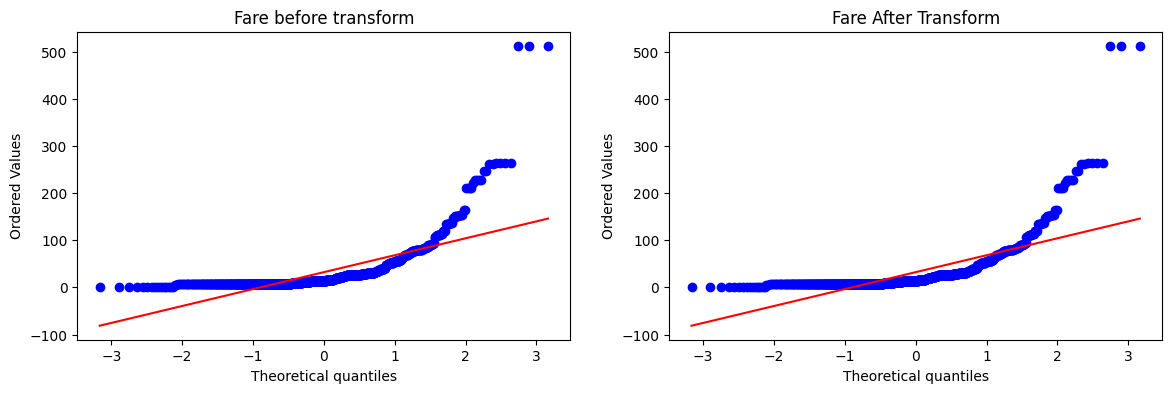

In [110]:
# No any transform apply 
apply_transform(lambda x: x)

Accuracy 0.6431335830212235


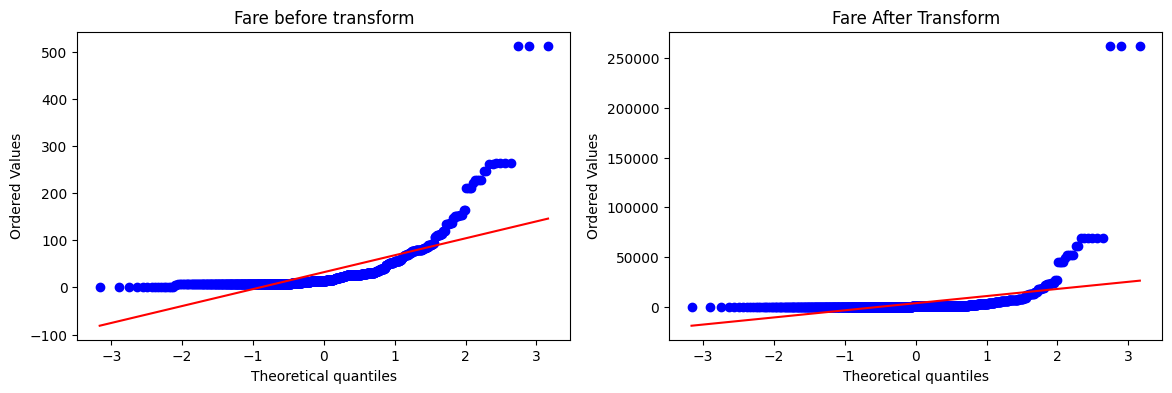

In [111]:
# Square transform 
apply_transform(lambda x: x**2)

Accuracy 0.6589013732833957


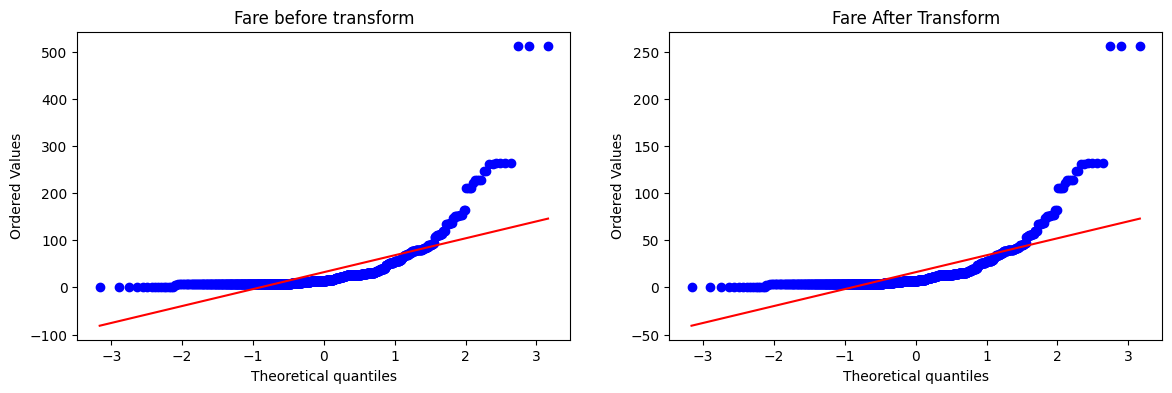

In [112]:
# Square root transform
apply_transform(lambda x: x**1/2)

Accuracy 0.6589013732833957


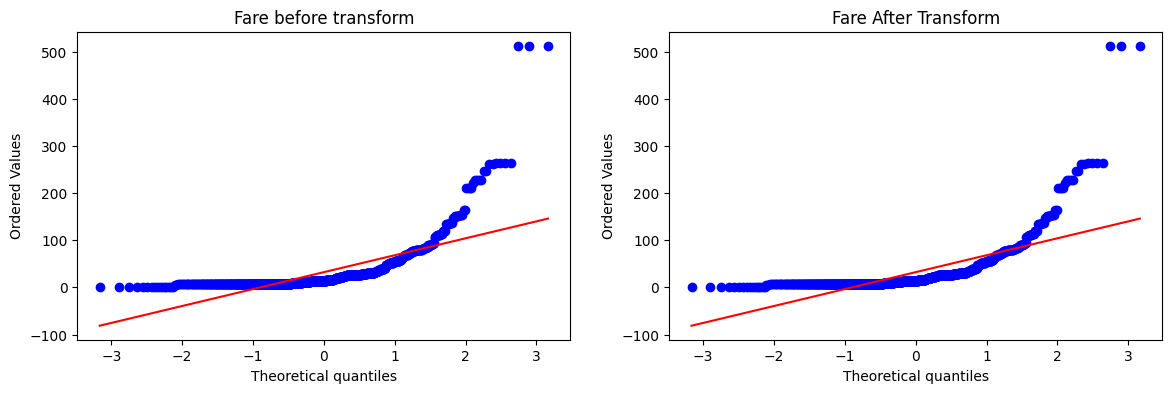

In [114]:
#Reciprocal transformation
apply_transform(lambda x: (x + 0.000001))

Accuracy 0.6195131086142323


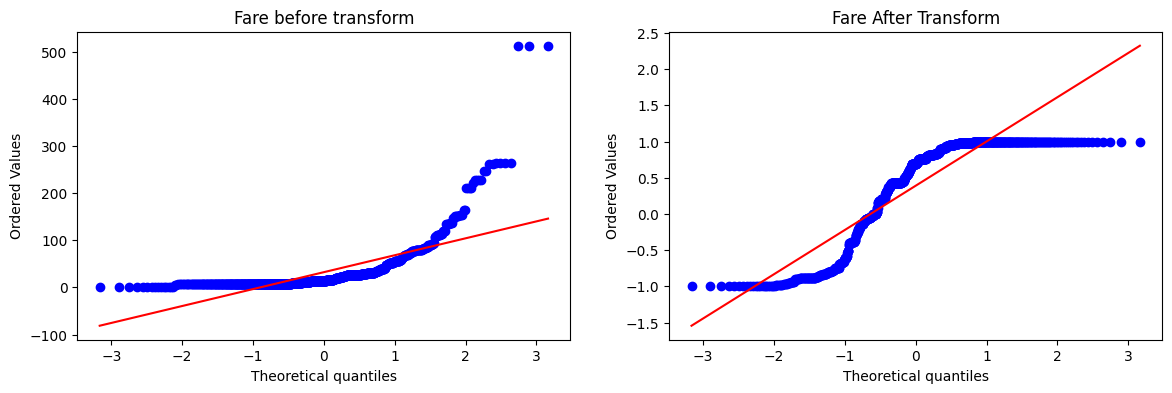

In [115]:
apply_transform(np.sin)